No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


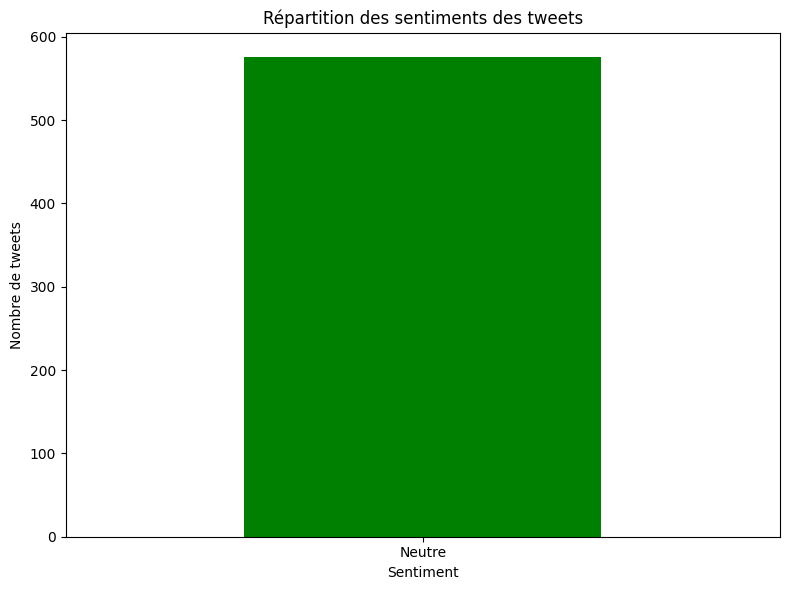

sentiment
Neutre    576
Name: count, dtype: int64


In [8]:

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from textblob import TextBlob

df = pd.read_csv('../Data/tweets_reformules.csv')

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'http\S+', '', regex=True)

sentiment_model = pipeline("sentiment-analysis")

def classify_sentiment(tweet):
    result = sentiment_model(tweet)
    label = result[0]['label']
    if label == 'LABEL_1':
        return 'Positif'
    elif label == 'LABEL_2':
        return 'Négatif'
    else:
        return 'Neutre'

df['sentiment'] = df['cleaned_tweet'].apply(classify_sentiment)

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Répartition des sentiments des tweets")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(sentiment_counts)
